# Notebook used for producing final processed data to go into the Report

In [2]:
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
from astroquery.vizier import Vizier

In [3]:
# --- Plot Parameters ---- 
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 100
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': True,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            })
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
colour_arrays = ['red', 'blue', 'green', 'crimson', 'lime']

## Importing Supplementary Data

In [4]:
bossini_et_al = Vizier.get_catalogs('J/A+A/623/A108')[0]
print(bossini_et_al.keys())
bossini_dist = bossini_et_al['Dist']; bossini_age = bossini_et_al['logA']

['Cluster', 'RA_ICRS', 'DE_ICRS', 'logA', 'e_logA', 'E_logA', 'Dist', 'e_Dist', 'E_Dist', 'AV', 'e_AV', 'E_AV', 'AGTO', 'e_AGTO', 'E_AGTO', 'Fe_H', 'r_Fe_H', 'SimbadName', '_RA.icrs', '_DE.icrs']


In [11]:
siegal_et_al = Vizier.get_catalogs('J/AJ/158/35/table2')[0]
print(siegal_et_al.keys())
siegal_dist = siegal_et_al['m-M']; siegal_age = siegal_et_al['log_Age_']

['Cluster', 'm-M', 'E_B-V_', 'f_E_B-V_', 'f_log_Age_', 'log_Age_', '__Fe_H_']


In [32]:
kharchenko_et_al = Vizier.get_catalogs('J/A+A/558/A53')[0]
print(kharchenko_et_al.keys())
# kharchenko_dist = kharchenko_et_al['MOD']; kharchenko_age = kharchenko_et_al['logt']

['map', 'cmd', 'stars', 'MWSC', 'Type', 'RAJ2000', 'DEJ2000', 'r0', 'r1', 'r2', 'pmRA', 'pmDE', 'RV', 'd', 'E_B-V_', 'logt', 'rc', 'rt', 'k', 'SType', '__Fe_H_', 'Simbad']


## Target Selection 

In [18]:
targets = pd.read_csv('supplementary_data/targetlist.csv')
observed = targets.loc[[np.where(targets['Group'] == 1)][0]]
proposed = targets.loc[[np.where(targets['Group'] == 2)][0]]
proposed['DistanceMod']

0    14.99
2    15.86
4    13.56
5    14.67
6    12.11
9    14.41
Name: DistanceMod, dtype: float64

In [6]:
this_work = SkyCoord(targets['RAJ2000'][np.where(targets['Group'] == 1)[0]], targets['DEJ2000'][np.where(targets['Group'] == 1)[0]], frame='fk5', unit=(u.hourangle, u.deg))
galtw = this_work.galactic

proposed =  SkyCoord(targets['RAJ2000'][np.where(targets['Group'] == 2)[0]], targets['DEJ2000'][np.where(targets['Group'] == 2)[0]], frame='fk5', unit=(u.hourangle, u.deg))
galprop = proposed.galactic

bossini_locations = SkyCoord(bossini_et_al['RA_ICRS'], bossini_et_al['DE_ICRS'], unit=(u.hourangle, u.deg))
bossini_locations = bossini_locations.galactic

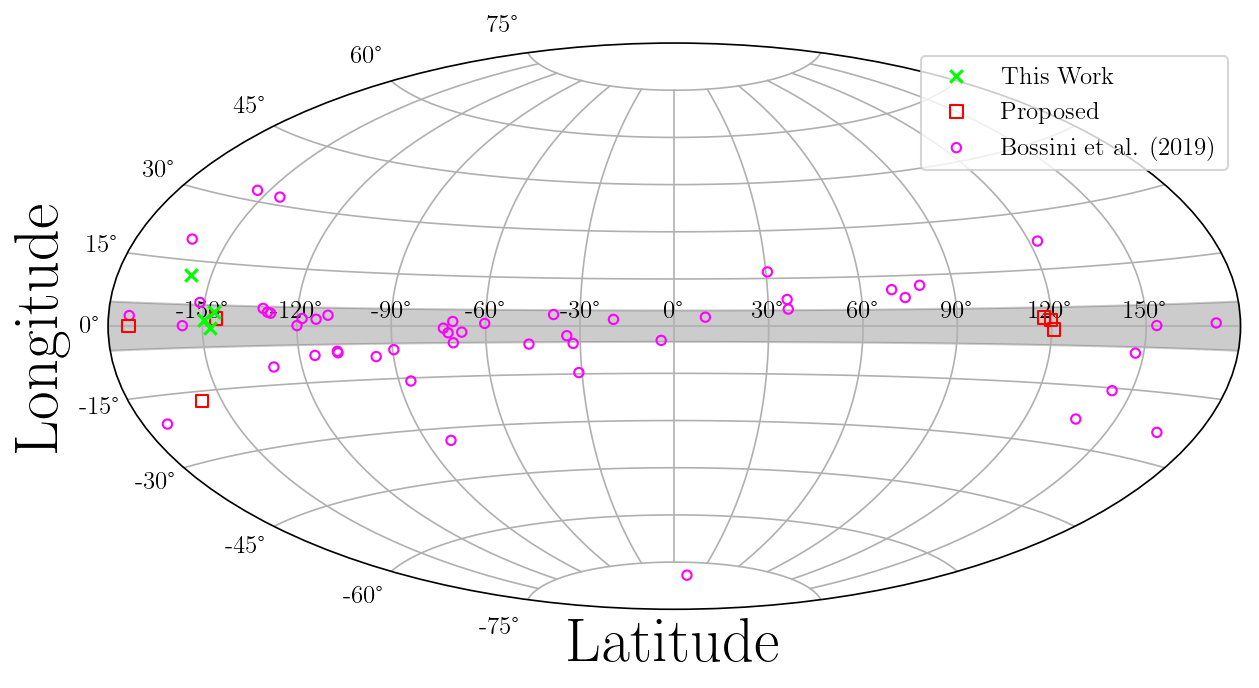

In [33]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10,5), dpi = 150)
plt.subplot(111, projection='aitoff')

plt.scatter(galtw.l.wrap_at('180d').radian, galtw.b.radian, marker = 'x', color = 'lime', label = 'This Work', zorder = 4)
plt.scatter(galprop.l.wrap_at('180d').radian, galprop.b.radian, marker = 's', facecolor = 'None', edgecolor = 'red', label = 'Proposed', zorder = 3)
plt.scatter(bossini_locations.l.wrap_at('180d').radian, bossini_locations.b.radian, marker = 'o', facecolor = 'None', edgecolor = 'fuchsia', label = 'Bossini et al. (2019)', zorder = 2, s = 20)

plt.axhspan(np.deg2rad(-5), np.deg2rad(5), alpha=0.2, color='black')
plt.grid(True)
plt.legend(loc = 'best', prop={'size': 12})
plt.xlabel('Latitude'); plt.ylabel('Longitude')
plt.savefig('plots/target_selection.pdf')

# Log Age vs. Distance Modulus

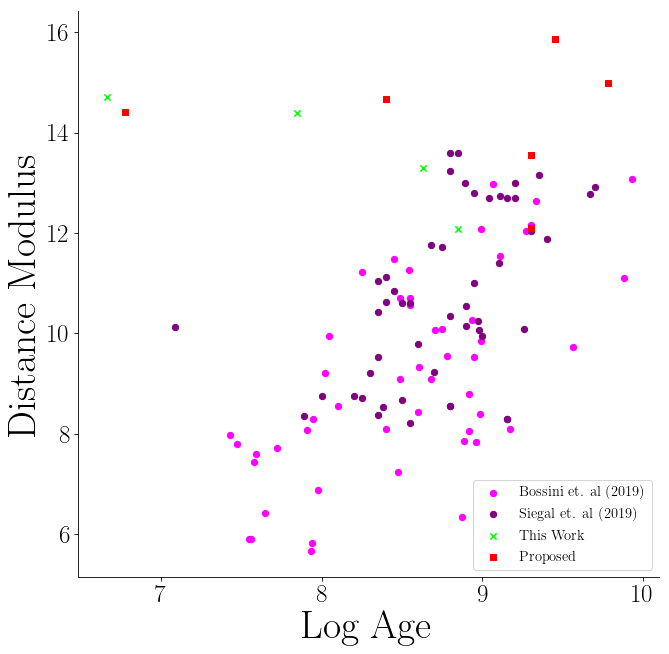

In [40]:
plt.rcParams.update({'font.size': 24})
plt.figure(figsize = (10, 10), dpi = 75)
# plt.scatter(proposed['Age'], proposed['DistanceMod'], facecolor = 'None', edgecolor = 'fuchsia', label = 'Lynga et al. (1987)', marker = 's')



plt.scatter(bossini_age, bossini_dist, label = 'Bossini et. al (2019)', color = 'fuchsia')
plt.scatter(siegal_age, siegal_dist, label = 'Siegal et. al (2019)', color = 'purple')
plt.scatter(observed['Age'], observed['DistanceMod'], color = 'lime', marker = 'x', label = 'This Work')
plt.scatter(proposed['Age'], proposed['DistanceMod'], color = 'red', marker = 's', label = 'Proposed')
# plt.scatter(kharchenko_age, kharchenko_dist)

plt.legend(loc = 'best', prop={'size': 14})
plt.ylabel('Distance Modulus', fontsize = 38)
plt.xlabel('Log Age', fontsize = 38)
plt.savefig('plots/supplementary_data_plot.pdf')
